In [1]:
# Installer yellowbrick si nécessaire
!pip install yellowbrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [2]:
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<Axes: xlabel='Channel'>

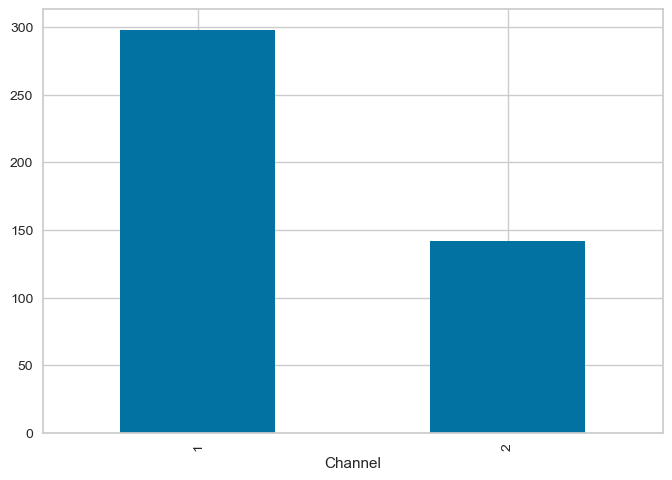

In [4]:
# type de distribution 
df['Channel'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Region'>

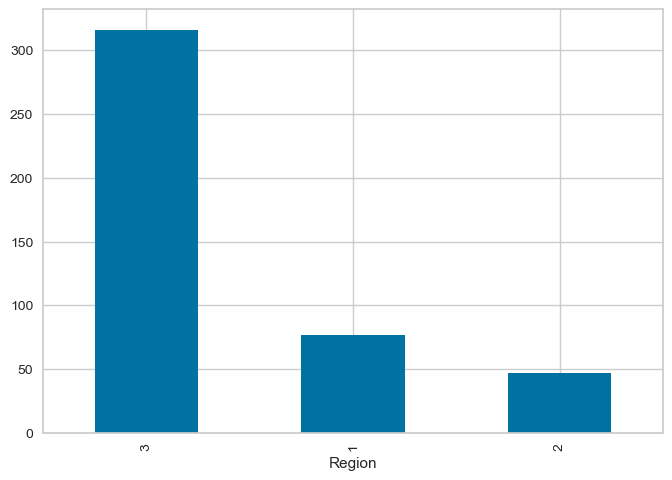

In [5]:
# regions des clients
df['Region'].value_counts().plot(kind = 'bar')

In [6]:
# Renommer la colonne 'Delicassen' en 'Delicatassen' (épicerie fine)
df = df.rename(columns={'Delicassen':'Delicatassen'}) 

# Mapper les valeurs de la colonne 'Channel' (1 -> 'HoReCa', 2 -> 'retail')
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'retail'}) # retail : vente au détail

# Mapper les valeurs de la colonne 'Region' (1 -> 'lisbon', 2 -> 'porto', 3 -> 'others')
df['Region'] = df['Region'].map({1: 'lisbon', 2: 'porto', 3: 'others'})


In [7]:
# table de frequence de la variable 'région'
df['Region'].value_counts()

Region
others    316
lisbon     77
porto      47
Name: count, dtype: int64

In [8]:
# table de frequence normaliser 
df['Region'].value_counts( normalize = True)

Region
others    0.718182
lisbon    0.175000
porto     0.106818
Name: proportion, dtype: float64

In [9]:
# stockage des nom des colonnes dans une liste 
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatassen']

In [10]:
#résumé statistique
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatassen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [12]:
#sauvegardons de df au format csv
df. to_csv('data_processed.csv')

In [13]:
#importation du fichier 'data_processed.csv'
df = pd.read_csv('data_processed.csv' , index_col = 0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,retail,others,12669,9656,7561,214,2674,1338
1,retail,others,7057,9810,9568,1762,3293,1776
2,retail,others,6353,8808,7684,2405,3516,7844
3,HoReCa,others,13265,1196,4221,6404,507,1788
4,retail,others,22615,5410,7198,3915,1777,5185


In [14]:
#structure de la df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatassen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


In [15]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatassen        0
dtype: int64

In [16]:
# VISUALISATION DES DONNéés 

In [17]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatassen']

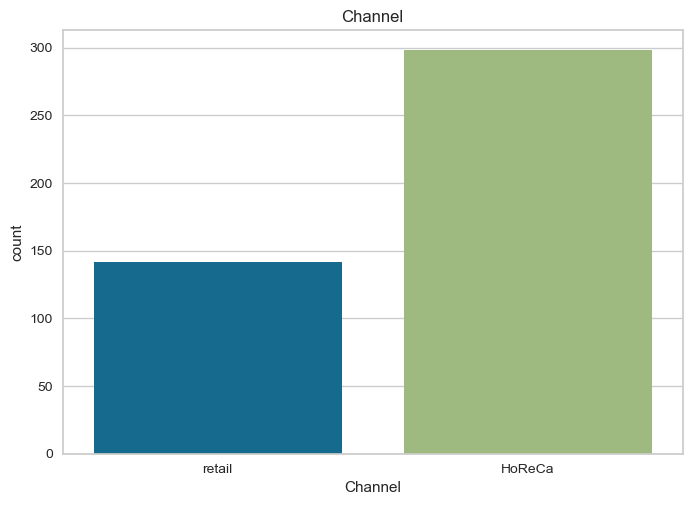

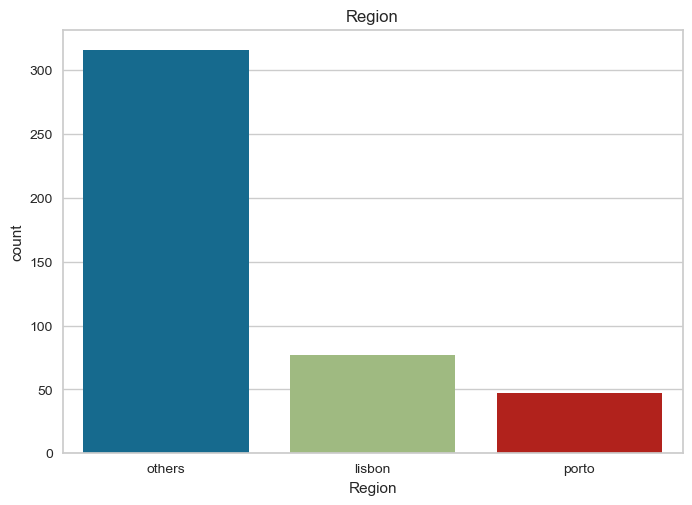

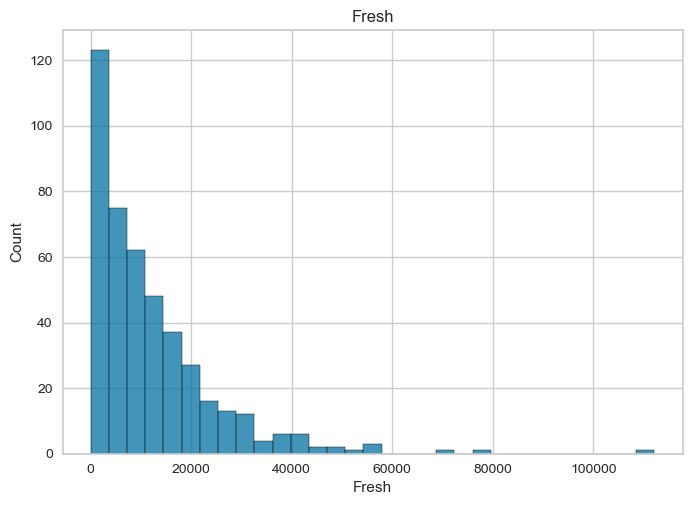

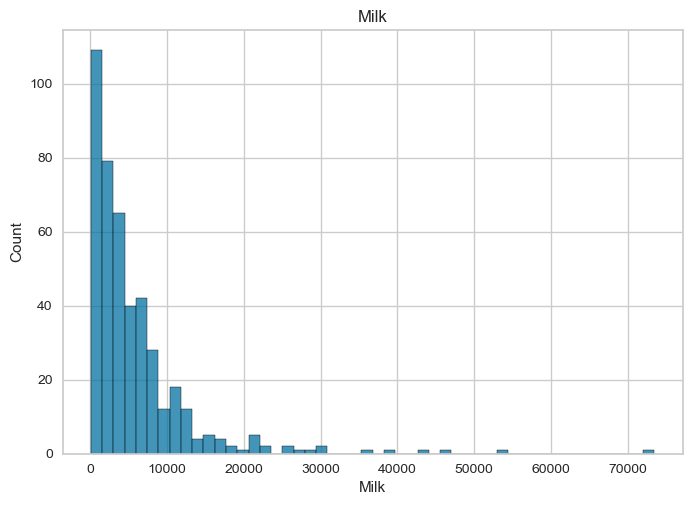

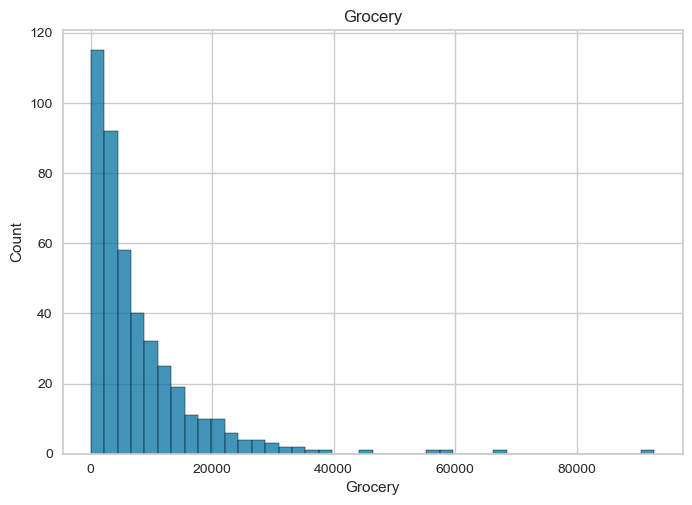

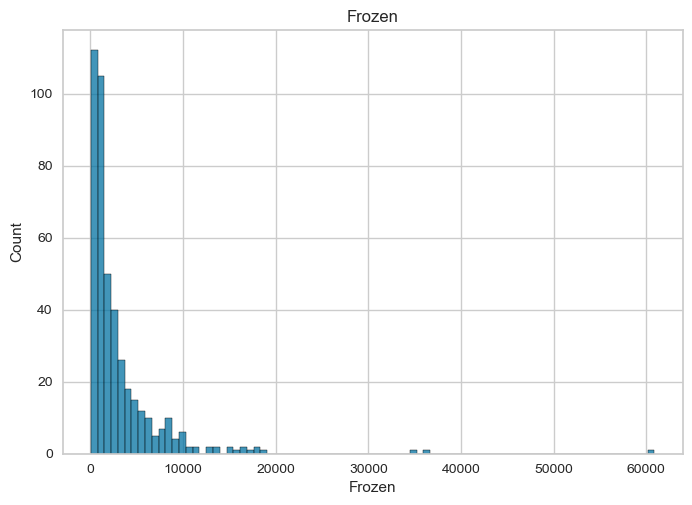

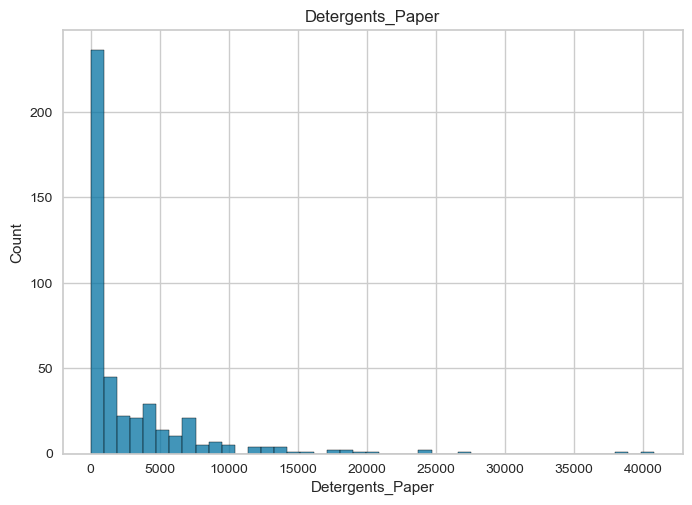

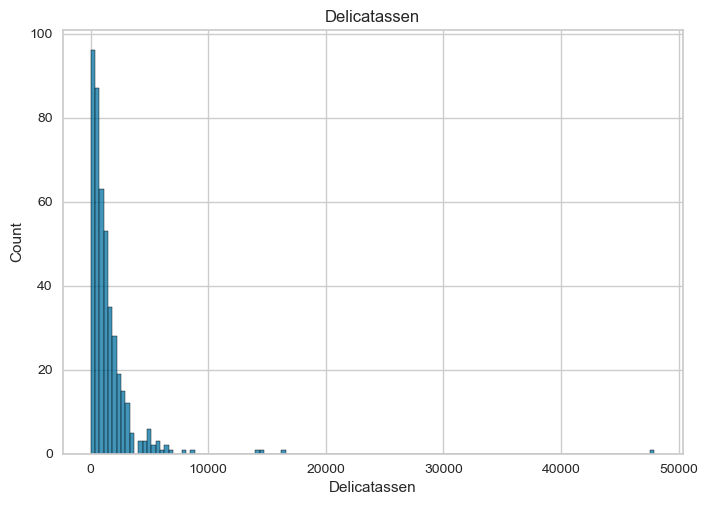

In [18]:
#diagramme en barre et histogrammes

for feature in features:
    if feature in ['Channel', 'Region']:
        sns.countplot(x=df[feature]).set_title(feature)
        plt.show()
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show()



C:\Users\lenovo\anaconda3ee\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


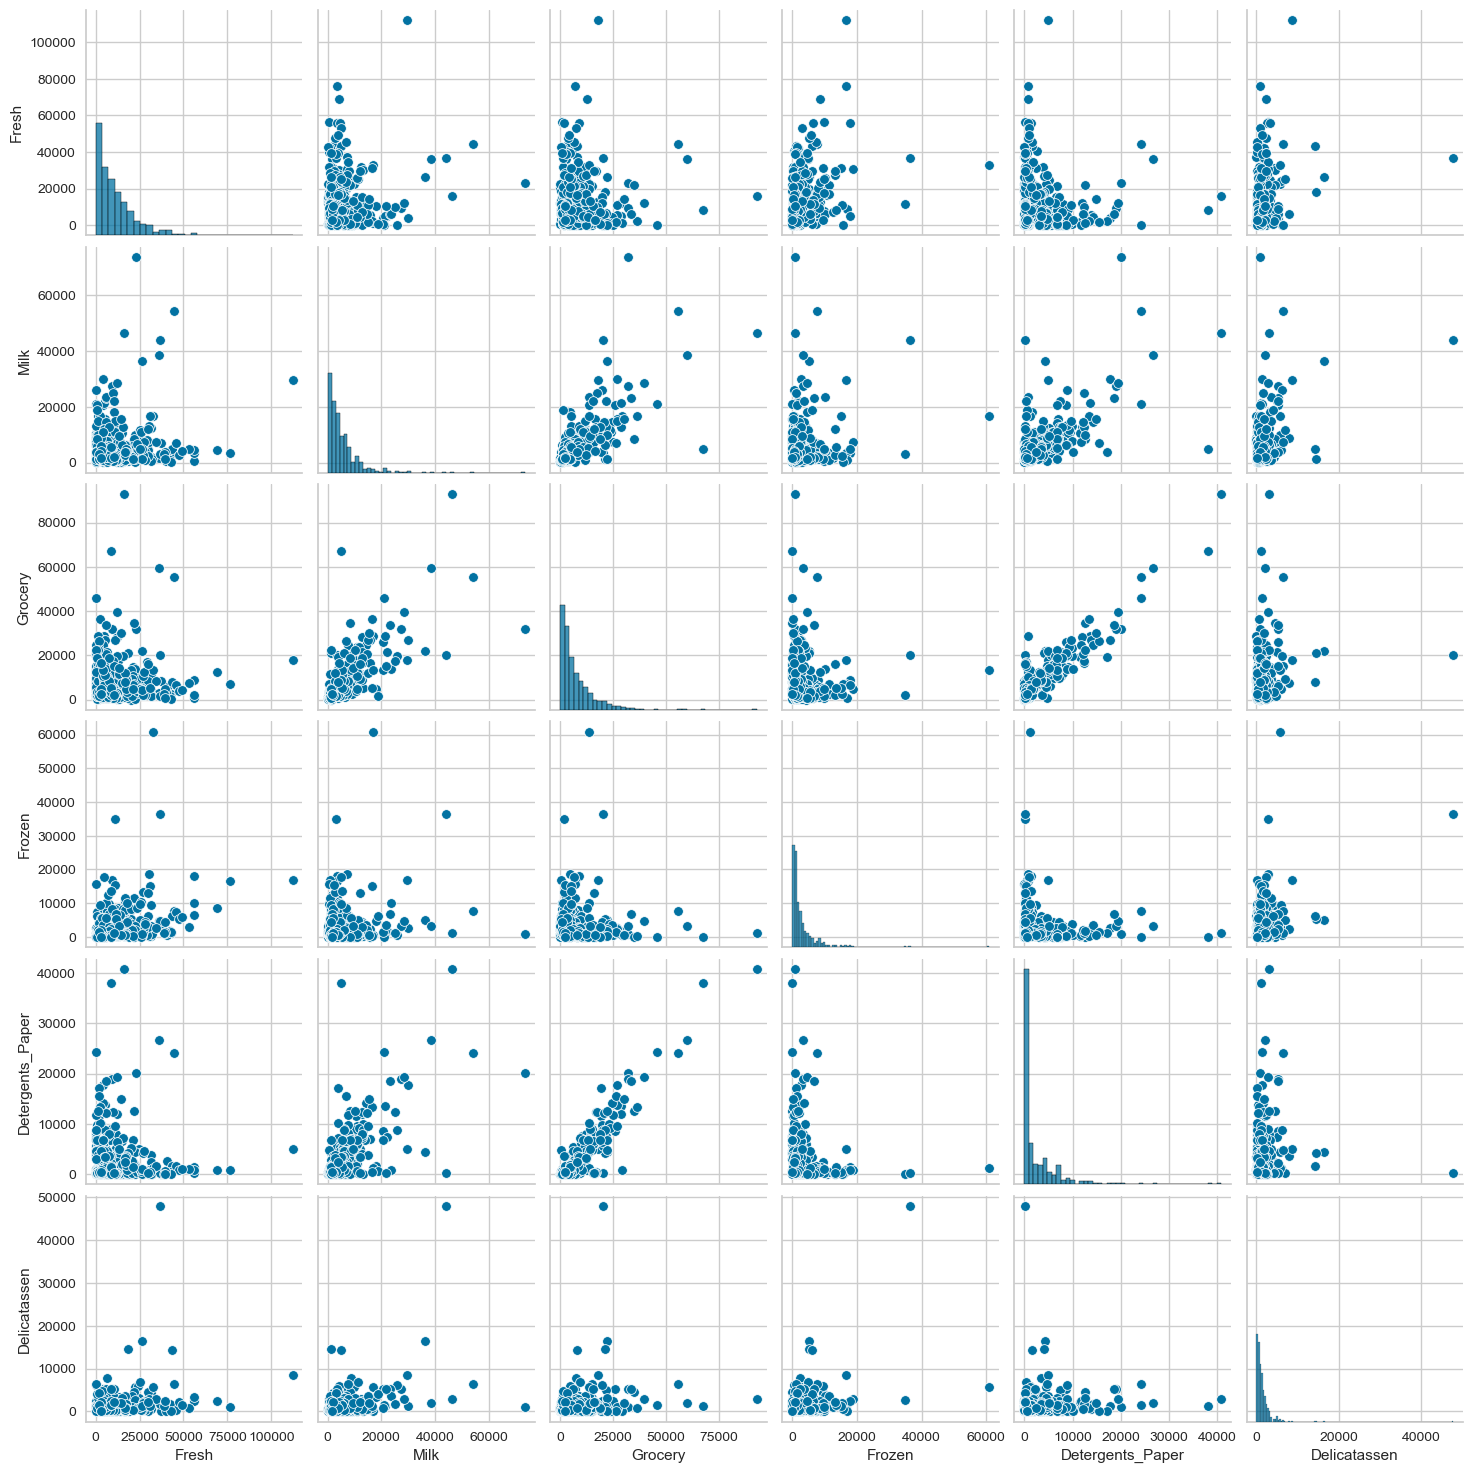

In [19]:
# matrice de visualisation
sns.pairplot(df)

In [20]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,retail,others,12669,9656,7561,214,2674,1338
1,retail,others,7057,9810,9568,1762,3293,1776


In [21]:
# ACP lineaire
# dataframe des variables numeriques de df 
data = df.drop (['Channel','Region'], axis = 1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [22]:
# standardisation
scaler = StandardScaler()
data = scaler.fit_transform(data)
type(data)

numpy.ndarray

In [23]:
# affichage de data 
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [24]:
# sauvegarde du tableau numpy 
np.save('training_data.npy', data )

In [25]:
# application de L'ACP
pca = PCA (n_components = 2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [26]:
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

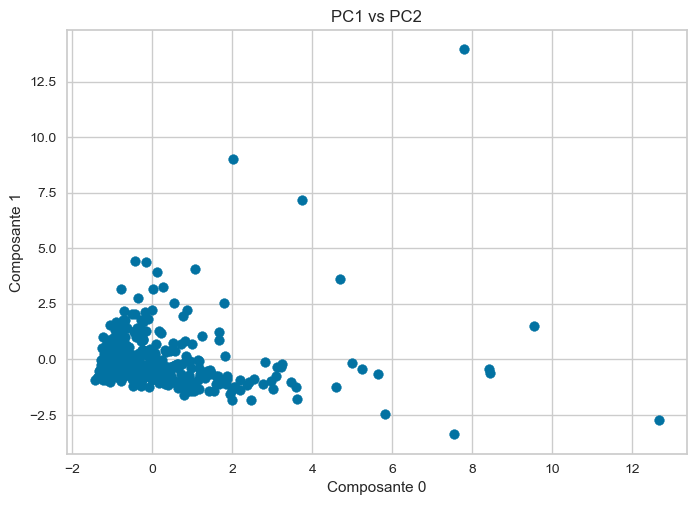

In [27]:
# visualisation des composantes principales
plt.scatter(res_pca[:, 0], res_pca[:, 1])
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

In [28]:
# coefficient de correlation de pearson obtenu après ACP
pearsonr(res_pca[:, 0], res_pca[:, 1]) 

PearsonRResult(statistic=-2.0816681711721685e-16, pvalue=0.9999999999999947)

In [29]:
# ACP non-LINEAIRE
# chargement des donneés d'entrainement précedement sauvegardé : 'training _data.npy' nous utiliserons l'algorithme KERNEL de sklean 

data = np.load('training_data.npy')

In [30]:
# KPCA avec noyau 'rbf'


kpca = KernelPCA(n_components=2, kernel='rbf')
res_kpca_rbf = kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

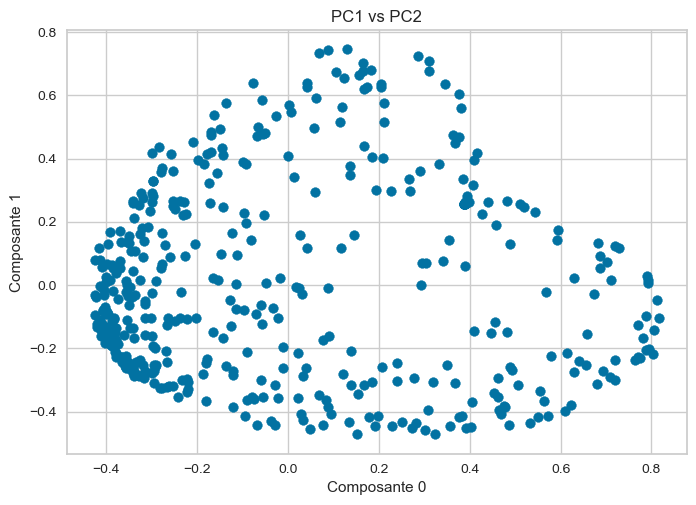

In [31]:
# visualisation du nuage de points des deux composantes 
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

In [32]:
# coefficient de correlation de pearson obtenue après KPCA 
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1]) 

PearsonRResult(statistic=-1.1449174941446927e-16, pvalue=0.9999999999999947)

In [33]:
# comparaison des coefficient de pearson 
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1]) [0] <  pearsonr(res_pca[:, 0], res_pca[:, 1]) [0]

False

In [34]:
# ajout des composantes principales comme colones de df 
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

In [35]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen,x_kpca_rbf,y_kpca_rbf
0,retail,others,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,retail,others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,retail,others,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,others,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,retail,others,22615,5410,7198,3915,1777,5185,0.136617,0.375279


In [36]:
# CLUSTERING K-MEANS AVEC LA METHODE COUDE 

In [37]:
# clustering avec 5 clusters
# Création du modèle de clustering KMeans avec 5 clusters
cluster_model = KMeans(n_clusters=5)

# Entraînement du modèle sur les données transformées
cluster_model.fit(res_kpca_rbf)

# Prédiction des clusters pour les données
clusters = cluster_model.predict(res_kpca_rbf)

C:\Users\lenovo\anaconda3ee\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
# affichons les clusters
clusters

array([3, 3, 4, 2, 4, 0, 0, 3, 0, 1, 3, 0, 4, 1, 4, 0, 3, 0, 4, 0, 2, 0,
       4, 4, 4, 0, 0, 0, 1, 4, 2, 0, 2, 4, 0, 3, 4, 1, 1, 4, 4, 2, 1, 1,
       3, 1, 1, 4, 3, 1, 0, 0, 4, 3, 2, 0, 4, 1, 0, 3, 3, 4, 3, 1, 0, 4,
       3, 3, 0, 0, 2, 4, 2, 2, 3, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 4, 4, 4,
       2, 2, 0, 2, 4, 4, 3, 0, 3, 0, 0, 2, 1, 1, 3, 4, 0, 2, 3, 1, 3, 1,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 3, 4, 4, 2, 4, 3, 4, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 2, 4, 4, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 2, 3, 1, 3, 0, 2, 1, 3, 1, 3, 0, 0, 0, 1, 1, 3, 1, 0, 3,
       4, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 3, 3, 3, 2, 0, 0, 1, 0, 2, 4, 3,
       0, 0, 1, 1, 4, 0, 0, 1, 0, 3, 3, 1, 2, 4, 0, 3, 3, 1, 1, 2, 1, 0,
       2, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 2, 0, 4, 4, 2,
       2, 0, 3, 1, 0, 2, 0, 0, 0, 4, 2, 4, 4, 2, 0, 0, 4, 4, 0, 2, 2, 0,
       1, 4, 1, 2, 1, 2, 0, 0, 3, 4, 0, 0, 4, 4, 2, 3, 0, 0, 4, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 0, 1, 2, 0, 2, 0, 3, 0, 0,

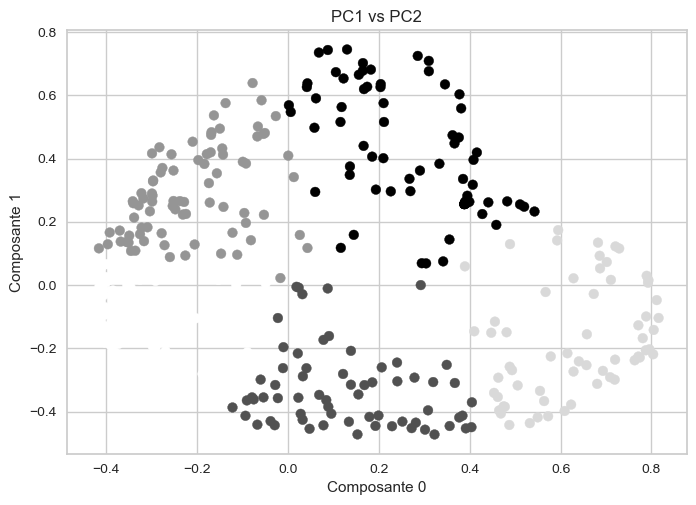

In [39]:
# visualisation des clusters
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1] , c = clusters)
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")
plt.show()

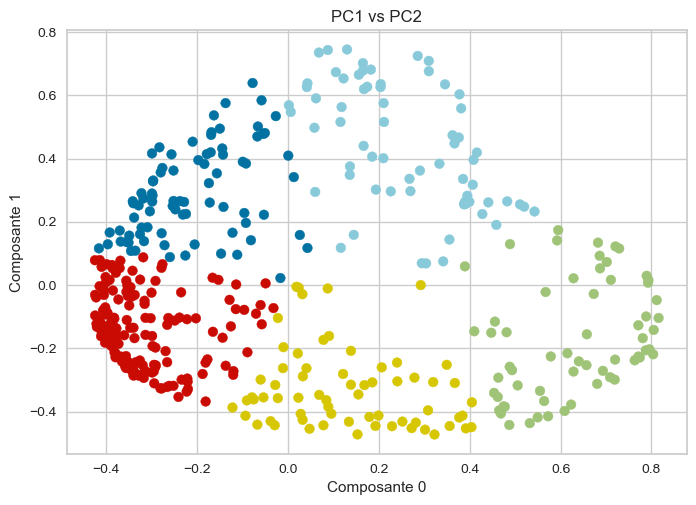

In [40]:
# Autres methodes 
# Liste des couleurs que vous souhaitez utiliser pour chaque cluster
couleurs = ['r', 'g', 'b', 'y', 'c']  # Vous pouvez ajouter d'autres couleurs si nécessaire

# Tracons en utilisant les couleurs définies pour chaque cluster
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], c=[couleurs[i] for i in clusters])

# Étiquetage des axes et titre du graphique
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2")

# Affichage du graphique
plt.show()


In [41]:
# intallation de yellowbrick
# pip install _uyellowbrick

C:\Users\lenovo\anaconda3ee\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3ee\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3ee\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3ee\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

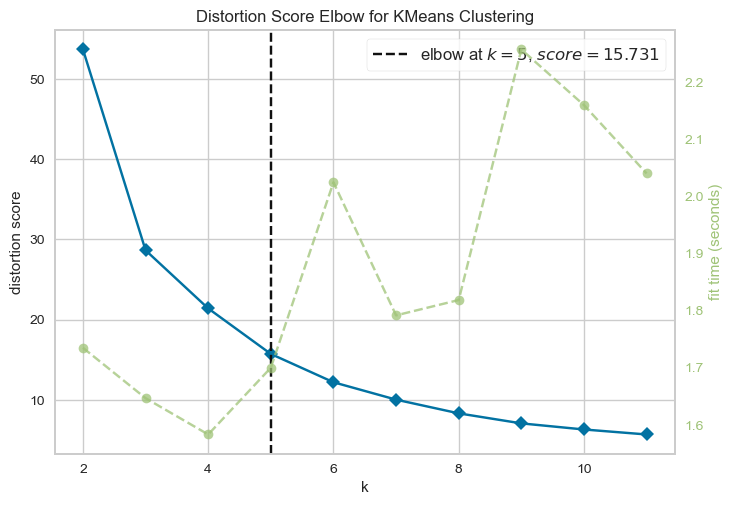

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# methode de coude 
# Création d'une instance de KMeans avec un nombre maximum de clusters pouvant aller de 2 à 12
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 12))

# Ajustement du visualiseur aux données transformées
visualizer.fit(res_kpca_rbf)

# Affichage du graphique
visualizer.show()

In [43]:
# ajout des cluster a df et sauvegarder au format csv
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

In [44]:
# chargement des données
df= pd.read_csv('data_with_clusters.csv', index_col = 0 )

In [45]:
# 5 premieres obsservations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatassen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,retail,others,12669,9656,7561,214,2674,1338,0.078374,-0.173115,3
1,retail,others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,3
2,retail,others,6353,8808,7684,2405,3516,7844,0.341702,0.075048,4
3,HoReCa,others,13265,1196,4221,6404,507,1788,-0.253304,0.250352,2
4,retail,others,22615,5410,7198,3915,1777,5185,0.136617,0.375279,4


In [46]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatassen']

In [47]:
df['cluster_kpca_rbf'].unique()

array([3, 4, 2, 0, 1], dtype=int64)

In [48]:
# centroides
df.groupby('cluster_kpca_rbf')[features].mean()

TypeError: Could not convert retailretailHoReCaretailHoReCaHoReCaHoReCaHoReCaretailHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaretailHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaretailHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaretailHoReCaHoReCaHoReCaHoReCaretailretailHoReCaretailHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaretailHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCaHoReCa to numeric

In [58]:
# Vérifions les types de données de vos colonnes
print(df.dtypes)

# Sélection uniquement les colonnes numériques pour l'opération groupby
numeric_features = df.select_dtypes(include=['number']).columns

# Effectuons l'opération groupby uniquement sur les colonnes numériques
centroids = df.groupby('cluster_kpca_rbf')[numeric_features].mean()

print(centroids)


Channel              object
Region               object
Fresh                 int64
Milk                  int64
Grocery               int64
Frozen                int64
Detergents_Paper      int64
Delicatassen          int64
x_kpca_rbf          float64
y_kpca_rbf          float64
cluster_kpca_rbf      int64
dtype: object
                         Fresh          Milk       Grocery       Frozen  \
cluster_kpca_rbf                                                          
0                  6538.062893   2390.238994   2977.622642  1705.238994   
1                  5357.064516  11624.112903  19493.741935  1360.161290   
2                 17569.506173   2351.679012   3157.061728  4259.222222   
3                  5010.815385   6713.061538   9540.538462  1217.676923   
4                 29583.671233  11270.945205  12885.630137  7836.178082   

                  Detergents_Paper  Delicatassen  x_kpca_rbf  y_kpca_rbf  \
cluster_kpca_rbf                                                           
